<a href="https://colab.research.google.com/github/LeeSeungwon89/Lecture-and-self-study/blob/master/6-3%20%EC%A3%BC%EC%84%B1%EB%B6%84%20%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주성분 분석

## 차원과 차원 축소

- 들어가기 전에 먼저 차원(Dimension)에 대하여 설명함.

- 다차원 배열의 차원과 1차원 배열의 차원은 다른가?

 - 다차원 배열과 1차원 배열(벡터)에서 차원이라는 용어는 조금 다르게 사용함.
 
 - 다차원 배열의 경우 차원은 배열의 축 개수를 의미함. 가령 2차원 배열일 때는 행과 열이 차원임. 첫 번째 축인 행과 두 번째 축인 열이 있으므로 2차원임.

 - 1차원 배열(벡터)의 경우 차원은 원소 개수를 의미함. 원소 5개가 있다면 5차원 벡터라고 함.

 아래 그림(출처: 혼자 공부하는 머신러닝 + 딥러닝)을 참고하면 이해하기 쉬움.
<img src='https://drive.google.com/uc?export=view&id=1VSOObccPOgnAglYZMcRU_cpCsUwKkhnA'>
이 서적을 정리하면서 가능하면 차원 대신 특성을 사용함. 물론 차원이라는 단어를 완전히 배제할 수는 없으므로 다른 정리를 진행할 때는 두 단어를 혼용해서 사용할 예정임.

- 이전 챕터에서 과일 사진은 픽셀 10,000개를 가졌었고, 이는 특성 10,000개를 가진 셈임. 머신러닝에서는 이런 특성을 '차원(Dimension)' 이라고도 부름. 차원 10,000개를 가졌다고도 표현할 수 있는데, 이런 차원이 많을수록 저장 공간을 많이 차지하게 됨. 비지도 학습 작업 중 하나인 '차원 축소(Dimensionality Reduction)' 알고리즘을 통해 차원을 줄이면 저장 공간을 크게 절약할 수 있음. 대표적인 차원 축소 알고리즘은 '주성분 분석(Principal component analysis)' 임.

- 차원 축소는 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킬 수 있는 방법임. 줄어든 차원에서 다시 원본 차원으로 손실을 최대한 줄이면서 복원할 수도 있음.

## 주성분 분석 소개

- '주성분 분석(Principal component analysis)' 은 줄여서 'PCA' 라고 부르며, 데이터 분산이 큰 방향을 찾는 것으로 이해할 수 있음. 분산은 데이터가 널리 퍼져있는 정도를 의미하며, 분산이 큰 방향을 데이터로 잘 표현하는 벡터로 생각할 수 있음.

 2차원 데이터를 예로 들어서 아래 그림(출처: 혼자 공부하는 머신러닝 + 딥러닝)으로 설명함.

 각 그림에 대한 설명은 그림 밑에 위치함.

 <img src='https://drive.google.com/uc?export=view&id=1ZXmEyWmC6VoH2HQuC21rljiHEmn5V5Bl' width = 50% >
 
 이 데이터는 x1, x2 라는 특성 2개가 있음. 대각선으로 길게 늘어진 형태임.

 <img src='https://drive.google.com/uc?export=view&id=1fimjCebPmegOfWtnnTxO_icM88fRG6HM' width = 50%>
 
 분산이 가장 큰 방향, 즉 데이터 분포를 가장 잘 표현하는 방향을 나타냄. 직관적으로 보면 길게 늘어진 대각선 방향이 분산이 가장 크다는 점을 알 수 있음. 화살표가 오른쪽 위로 향하든 왼쪽 아래로 향하든 큰 의미는 없음. 분산이 큰 방향을 찾는 것이 중요함.

 <img src='https://drive.google.com/uc?export=view&id=1KfgnqH7w01OxvRjVXdocUSqPvDKJlPRx' width = 50%>
 
 이 직선이 원점에서 출발한다면 (2, 1)처럼 두 원소로 이루어진 벡터로 쓸 수 있음. 실제로 'PCA' 모델을 훈련하면 자동으로 특성마다 평균값을 빼서 원점에 맞춰 주므로 데이터를 직접 원점에 맞출 필요가 없음. 여하튼 이 벡터를 '주성분(Principal component)' 이라고 하며 원본 데이터에 있는 어떤 방향을 의미함. 주성분 벡터의 원소 개수는 원본 데이터셋에 있는 특성 개수와 같음.

 <img src='https://drive.google.com/uc?export=view&id=1wzK0Lijl1aaENTuXAkgiiVktx3vK64Xi' width = 50%>

 주성분을 사용하여 원본 데이터의 차원을 줄일 수 있음. 그림처럼 예를 들면 샘플 데이터 s(4, 2)를 주성분에 직각으로 투영하면 1차원 데이터 p(4, 5)를 만들 수 있음. 주성분은 원본 차원과 같고, 주성분으로 바꾼 데이터는 차원이 줄어듦. 주성분이 가장 분산이 큰 방향이기 때문에 주성분에 투영하여 바꾼 데이터는 원본이 가진 특성을 가장 잘 나타냄.

 <img src='https://drive.google.com/uc?export=view&id=1aGSY0zm3RKysNsSkRGbjnBbFyHz2GWOO' width = 50%>

 첫 번째 주성분을 찾은 다음에 이 벡터에 수직이면서 분산이 가장 큰 다음 방향을 찾으면 이 찾은 벡터가 두 번째 주성분임. 여기서는 2차원이기 때문에 두 번째 주성분의 방향은 그림처럼 하나뿐임.
 
- 일반적으로 비지도 학습은 대량의 데이터에서 수행하기 때문에 원본 특성 개수만큼 찾을 수 있다고 말함. 물론 기술적인 이유로 주성분은 원본 특성 개수와 샘플 개수 중 작은 값만큼 찾을 수 있음.

## PCA 클래스

### 데이터 준비

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100 * 100)

--2021-07-19 16:24:02--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2021-07-19 16:24:02--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2021-07-19 16:24:02--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [7]:
# 'PCA' 클래스의 객체를 만들 때 'n_components' 매개변수에 주성분 개수를 지정해야 함.
# 비지도 학습이므로 'fit()' 메서드에 타깃값을 제공하지 않음.
from sklearn.decomposition import PCA

pca = PCA(n_components = 50)
pca.fit(fruits_2d)

# 'PCA' 클래스가 찾은 주성분은 'n_components_' 속성에 저장됨.
print(pca.components_)
print()
print(pca.components_.shape)
# 'n_components' 매개변수를 50으로 지정했기 때문에 'pca.components_' 배열의 첫 번째 차원이 50임.
# 즉 주성분 50개를 찾은 것임. 두 번째 차원은 원본 데이터의 특성 개수와 같은 10,000임.

[[ 9.24490195e-06  5.10601298e-06  8.91640398e-06 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.69701614e-05 -1.13551046e-05 -1.82152562e-05 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [-3.65220452e-05 -2.08401733e-05 -2.89870108e-05 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 ...
 [ 2.60542941e-05 -5.40384772e-05 -1.21729389e-05 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [-1.12238710e-04 -4.74528567e-05 -1.09970689e-04 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [ 1.55730802e-04 -8.26612359e-05 -4.78680761e-05 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]]

(50, 10000)


In [4]:
# 원본 데이터와 차원이 같으므로 주성분을 100 x 100 크기의 이미지처럼 출력할 수 있음.
# 이전 절에서 사용했던 'draw_fruits()' 함수를 사용하여 그림을 그림.
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio = 1) :

    n = len(arr)

    rows = int(np.ceil(n / 10))

    cols = n if rows < 2 else 10

    fig, axs = plt.subplots(rows, cols, figsize = (cols * ratio, rows * ratio), 
                            squeeze = False)

    for i in range(rows) :
        for j in range(cols) :
            if i * 10 + j < n :
                axs[i, j].imshow(arr[i * 10 + j], cmap = 'gray_r')
            axs[i, j].axis('off')

    plt.show()

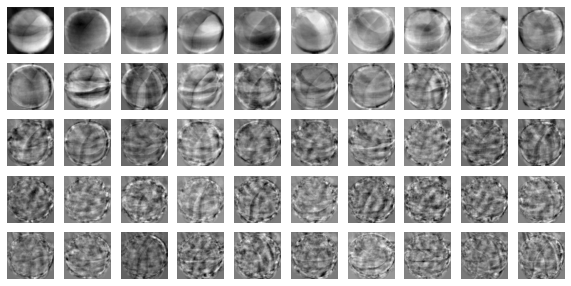

In [5]:
draw_fruits(pca.components_.reshape(-1, 100, 100))
# 괴상한 사진이 출력됨.
# 이 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것임.
# 한편으로는 데이터셋에 있는 어떤 특징을 잡아낸 것으로도 생각할 수 있음.

In [9]:
# 주성분을 찾았으므로 원본 데이터를 주성분에 투영하여 특성 개수를 10,000개에서 50개로 줄일 수 있음.
# 마치 원본 데이터를 각 주성분으로 분해한다고 생각할 수 있음.
# 'PCA' 클래스의 'transform()' 메서드를 사용하여 원본 데이터의 차원을 50으로 줄임.
print(fruits_2d.shape)

fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)
# 차원이 10,000에서 50으로 줄었음. 1/200 수준으로 줄어듦.
# 'fruits_2d' 대신 'fruits_pca' 를 저장하면 저장 공간을 훨씬 줄일 수 있음.

(300, 10000)
(300, 50)


### 원본 데이터 재구성

In [ ]:
정리 중..

## 설명된 분산

## 다른 알고리즘과 함께 사용하기